In [1]:
pip install https://github.com/satfra/DiFfRG/raw/refs/heads/main/python/dist/DiFfRG-1.0.0-py3-none-any.whl

  Using cached https://github.com/satfra/DiFfRG/raw/refs/heads/main/python/dist/DiFfRG-1.0.0-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import DiFfRG.phasediagram as pd
import DiFfRG.file_io as io
import DiFfRG.plot as plt
import numpy as np

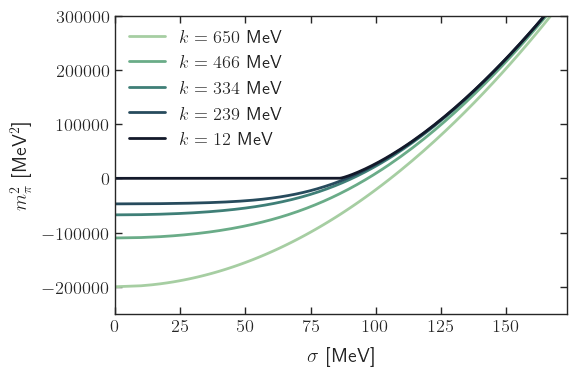

In [19]:
folder = "./build/"
sim = io.SimulationData1D(folder + 'output')

t_range = np.append(np.linspace(0, 1, 4), 4)
x = [sim.get_x(t=t) for t in t_range]
k = [sim.params['physical']['Lambda'] * np.exp(-t) for t in t_range]
u_times = [sim.get_array('m2', t=t) for t in t_range]

plt.plot_1D(
    [
        {
            "x" : np.sqrt(2. * x[i]) * 1e3,
            "y" : u_times[i] * 1e6,
            "label": f"$k = {1e3*k[i]:.0f}$ MeV",
            "color": plt.palette2[i+1]
        } for i in range(len(u_times))
    ],
    xlabel = r"$\sigma$ [MeV]",
    ylabel = r"$m_\pi^2$ [MeV$^2$]",
    legend_loc="upper left",
    #file="evolution.pdf"
    ylim=(-0.25 * 1e6, 0.3 * 1e6),
)